# Modelleren - analyse opdracht

## Simulatie basis model

- dm/dt = -m(r0 - c) + c - kel/koff * m
- dc/dt = m(r0 - c) - c

In [2]:
# prepare environment
import numpy as np
import matplotlib.pyplot as plt

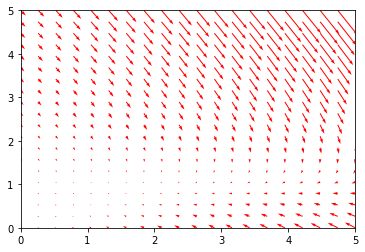

In [61]:
# https://kitchingroup.cheme.cmu.edu/blog/2013/02/21/Phase-portraits-of-a-system-of-ODEs/

# function that calculates dm/dt and dc/dt
def ddt(m, c, r0, kel, koff):
    dmdt = -m*(r0 - c) + c - (kel/koff) * m
    dcdt = m*(r0 - c) - c
    return [dmdt, dcdt]

# function that produces phase plane 
def pplane(m_max, c_max, r0, kel, koff):
    # grid of values for m and c
    m = np.linspace(0, m_max, 20)
    c = np.linspace(0, c_max, 20)

    # matrices/arrays to save outcomes 
    M, C = np.meshgrid(m, c)
    u, v = np.zeros(M.shape), np.zeros(C.shape)

    # calculate values for grid of m,c
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            x = M[i,j]
            y = C[i,j]
            yprime = ddt(x, y, r0, kel, koff)
            u[i,j] = yprime[0]
            v[i,j] = yprime[1]

    # plot phase plane 
    Q = plt.quiver(M, C, u, v, color = 'r')
    plt.xlim([0,m_max])
    plt.ylim([0,c_max])
    plt.xlabel = ('m')
    plt.ylabel = ('c')

# test function 
pplane(5, 5, 1, 1, 1)

(0.0, 20.0)

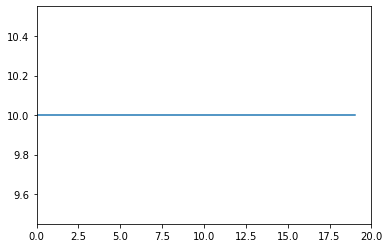

In [57]:
# function to perform simulation 
def sim(m0, c0, r0, kel, koff, t_length):
    # create vectors to save m, c values
    m_vec = np.zeros(t_length)
    c_vec = np.zeros(t_length) 
    
    # calculate values of m,c after each time interval
    for i in range(t_length):
        if i == 0: 
            # set starting values for m, c
            m_vec[i] = m0
            c_vec[i] = c0
        else: 
            # calculate change in m, c
            m_diff, c_diff = ddt(m_vec[i-1], m_vec[i-1], r0, kel, koff)
            m_vec[i] = m_vec[i-1] + m_diff
            c_vec[i] = c_vec[i-1] + c_diff
            
    return [m_vec, c_vec]

# set starting values 
m0 = 10
c0 = 0
r0 = 10
kel = 1
koff = 1 
t_length = 20 

# try function 
sim(m0, c0, r0, kel, koff, t_length)

# plot simulation 
plt.plot(sim(m0, c0, r0, kel, koff, t_length)[0])
plt.xlim(0, t_length)

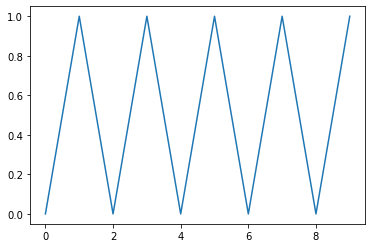

In [86]:
# function to perform simulation 
def sim(m0, c0, r0, kel, koff, t_length):
    # create vectors to save m, c values
    m_vec = np.zeros(t_length)
    c_vec = np.zeros(t_length) 
    
    # create vectors to save dm/dt, dc/dt values
    m_diff = np.zeros(t_length-1)
    c_diff = np.zeros(t_length-1) 
    
    # calculate values of m,c after each time interval
    for i in range(t_length):
        if i == 0: 
            # set starting values for m, c
            m_vec[i] = m0
            c_vec[i] = c0
        else: 
            # calculate change in m, c
            m_diff[i-1], c_diff[i-1] = ddt(m_vec[i-1], c_vec[i-1], r0, kel, koff)
            m_vec[i] = m_vec[i-1] + m_diff[i-1]
            c_vec[i] = c_vec[i-1] + c_diff[i-1]
            
    return [m_vec, c_vec]

# set starting values 
m0 = 1
c0 = 0
r0 = 1
kel = 10
koff = 10 
t_length = 10

# try function 
sim(m0, c0, r0, kel, koff, t_length)[1]

# plot 
plt.plot(sim(m0, c0, r0, kel, koff, t_length)[1])